In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [7]:

data = pd.read_csv('data.csv') 
data = data.drop(columns=['Unnamed: 0'])
data.columns = data.columns.str.lower()

print("\nShape of the data:")
print(data.shape)

print("\nDescription of the data:")
print(data.describe())

data.head()




Shape of the data:
(3998, 38)

Description of the data:
                 id        salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          collegeid  collegetier   collegegpa  collegecityid  collegecitytier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
data['doj']=pd.to_datetime(data['doj'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3998 non-null   int64         
 1   salary                 3998 non-null   float64       
 2   doj                    3998 non-null   datetime64[ns]
 3   dol                    3998 non-null   object        
 4   designation            3998 non-null   object        
 5   jobcity                3998 non-null   object        
 6   gender                 3998 non-null   object        
 7   dob                    3998 non-null   object        
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  col

1.DATA CLEANING

In [16]:
unique_cities=data['jobcity'].unique()
unique_cities

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [18]:
data.jobcity=data.jobcity.str.strip().str.lower()
unique_cities_cleaned=data['jobcity'].unique()
print(unique_cities_cleaned)

['bangalore' 'indore' 'chennai' 'gurgaon' 'manesar' 'hyderabad' 'banglore'
 'noida' 'kolkata' 'pune' '-1' 'mohali' 'jhansi' 'delhi' 'bhubaneswar'
 'navi mumbai' 'mumbai' 'new delhi' 'mangalore' 'rewari' 'gaziabaad'
 'bhiwadi' 'mysore' 'rajkot' 'greater noida' 'jaipur' 'thane'
 'maharajganj' 'thiruvananthapuram' 'punchkula' 'bhubaneshwar'
 'coimbatore' 'dhanbad' 'lucknow' 'trivandrum' 'gandhi nagar' 'una'
 'daman and diu' 'gurgoan' 'vsakhapttnam' 'nagpur' 'bhagalpur'
 'new delhi - jaisalmer' 'ahmedabad' 'kochi/cochin' 'bankura' 'bengaluru'
 'kanpur' 'vijayawada' 'kochi' 'beawar' 'alwar' 'siliguri' 'raipur'
 'bhopal' 'faridabad' 'jodhpur' 'udaipur' 'muzaffarpur' 'kolkata`'
 'bulandshahar' 'haridwar' 'raigarh' 'visakhapatnam' 'jabalpur' 'unnao'
 'aurangabad' 'belgaum' 'dehradun' 'rudrapur' 'jamshedpur' 'vizag' 'nouda'
 'dharamshala' 'banagalore' 'hissar' 'ranchi' 'madurai' 'gurga'
 'chandigarh' 'australia' 'cheyyar' 'sonepat' 'ghaziabad' 'pantnagar'
 'jagdalpur' 'angul' 'baroda' 'ariyalur

In [22]:
city_mapping={
    'bangalore':'Bangalore',
    'banglore':'Banglore',
    'banagalore':'Bangalore',
    'bengaluru': 'Bangalore',
'asifabadbanglore': 'Bangalore',
'indore': 'Indore',
'chennai': 'Chennai',
'gurgaon': 'Gurgaon',
'gurgoan': 'Gurgaon',
'gurga': 'Gurgaon',
'manesar': 'Manesar',
'hyderabad': 'Hyderabad',
'hderabad': 'Hyderabad',
'hyderabad (bhadurpally)': 'Hyderabad',
'noida': 'Noida',
'nouda': 'Noida',
'kolkata': 'Kolkata',
'kolkata"': 'Kolkata',
'pune': 'Pune',
'-1': 'Unknown',
'mohali': 'Mohali',
'jhansi': 'Jhansi',
'delhi': 'Delhi',
'new delhi': 'New Delhi',
'bhubaneswar': 'Bhubaneswar',
'bhubaneshwar': 'Bhubaneswar',
'navi mumbai': 'Navi Mumbai',
'mumbai': 'Mumbai',
'mangalore': 'Mangalore',
'rewari': 'Rewari',
'gaziabaad': 'Ghaziabad',
'ghaziabad': 'Ghaziabad',
'bhiwadi': 'Bhiwadi',
'mysore': 'Mysore',
'rajkot': 'Rajkot',
'greater noida': 'Greater Noida',
'jaipur': 'Jaipur',
'thane': 'Thane',
'maharajganj': 'Maharajganj',
'thiruvananthapuram': 'Thiruvananthapuram',
'punchkula': 'Panchkula',
'coimbatore': 'Coimbatore',
'dhanbad': 'Dhanbad',
'lucknow': 'Lucknow',
'trivandrum': 'Thiruvananthapuram',
'gandhi nagar': 'Gandhinagar',
'una': 'Una',
'daman and diu': 'Daman and Diu',
'vsakhapttnam': 'Visakhapatnam',
'nagpur': 'Nagpur',
    'bhagalpur': 'Bhagalpur',
'new delhi - jaisalmer': 'New Delhi',
'ahmedabad': 'Ahmedabad',
'kochi/cochin': 'Kochi',
'bankura': 'Bankura',
'kanpur': 'Kanpur',
'vijayawada': 'Vijayawada',
'kochi': 'Kochi',
'beawar': 'Beawar',
'alwar': 'Alwar',
'siliguri': 'Siliguri',
'raipur': 'Raipur',
'bhopal': 'Bhopal',
'faridabad': 'Faridabad',
'jodhpur': 'Jodhpur',
'udaipur': 'Udaipur',
'muzaffarpur': 'Muzaffarpur',
'bulandshahar': 'Bulandshahar',
'haridwar': 'Haridwar',
'raigarh': 'Raigarh',
'visakhapatnam': 'Visakhapatnam',
'jabalpur': 'Jabalpur',
'unnao': 'Unnao',
'aurangabad': 'Aurangabad',
'belgaum': 'Belgaum',
'dehradun': 'Dehradun',
'rudrapur': 'Rudrapur',
'jamshedpur': 'Jamshedpur',
'vizag': 'Visakhapatnam',
'nouda': 'Noida',
'dharamshala': 'Dharamshala',
'hissar': 'Hisar',
'ranchi': 'Ranchi',
'madurai': 'Madurai',
'chandigarh': 'Chandigarh',
'australia': 'Australia',
'cheyyar': 'Cheyyar',
'sonepat': 'Sonepat',
'pantnagar': 'Pantnagar',
'jagdalpur': 'Jagdalpur',
'angul': 'Angul',
'baroda': 'Vadodara',
'ariyalur': 'Ariyalur',
'jowai': 'Jowai',
'neemrana': 'Neemrana',
'tirupathi': 'Tirupati',
'bhubneshwar': 'Bhubaneswar',
    'calicut': 'Kozhikode',
'gandhinagar': 'Gandhinagar',
'dubai': 'Dubai',
'ahmednagar': 'Ahmednagar',
'nashik': 'Nashik',
'bellary': 'Bellary',
'ludhiana': 'Ludhiana',
'muzaffarnagar': 'Muzaffarnagar',
'gagret': 'Gagret',
'indirapuram, ghaziabad': 'Ghaziabad',
'gwalior': 'Gwalior',
'chennai & mumbai': 'Chennai',
'rajasthan': 'Rajasthan',
'sonipat': 'Sonipat',
'bareli': 'Bareli',
'hospete': 'Hospete',
'miryalaguda': 'Miryalaguda',
'dharuhera': 'Dharuhera',
'meerut': 'Meerut',
'ganjam': 'Ganjam',
'hubli': 'Hubli',
'ncr': 'NCR',
'agra': 'Agra',
'trichy': 'Tiruchirappalli',
'kudankulam ,tarapur': 'Kudankulam',
'ongole': 'Ongole',
'sambalpur': 'Sambalpur',
'pondicherry': 'Puducherry',
'bundi': 'Bundi',
'sadulpur, rajgarh, distt-churu, rajasthan': 'Rajasthan',
'am': 'Am',
'bikaner': 'Bikaner',
'vadodara': 'Vadodara',
'india': 'India',
'asansol': 'Asansol',
'tirunelvelli': 'Tirunelveli',
'ernakulam': 'Ernakulam',
'bilaspur': 'Bilaspur',
'chandrapur': 'Chandrapur',
'nanded': 'Nanded',
'dharmapuri': 'Dharmapuri',
'vandavasi': 'Vandavasi',
'rohtak': 'Rohtak',
'patna': 'Patna',
'salem': 'Salem',
'nasikcity': 'Nashik',
'technopark, trivandrum': 'Trivandrum',
    'bharuch': 'Bharuch',
'tornagallu': 'Tornagallu',
'jaspur': 'Jaspur',
'burdwan': 'Burdwan',
'shimla': 'Shimla',
'gajiabaad': 'Ghaziabad',
'jammu': 'Jammu',
'shahdol': 'Shahdol',
'muvattupuzha': 'Muvattupuzha',
'al jubail, saudi arabia': 'Al Jubail',
'kalmar, sweden': 'Kalmar',
'secunderabad': 'Secunderabad',
'a-64,sec-64,noida': 'Noida',
'ratnagiri': 'Ratnagiri',
'jhajjar': 'Jhajjar',
'gulbarga': 'Gulbarga',
'hyderabad (bhadurpally)': 'Hyderabad',
'nalagarh': 'Nalagarh',
'jeddah saudi arabia': 'Jeddah',
'chennai, bangalore': 'Chennai',
'jamnagar': 'Jamnagar',
'tirupati': 'Tirupati',
'gonda': 'Gonda',
'orissa': 'Odisha',
'kharagpur': 'Kharagpur',
'navi mumbai , hyderabad': 'Navi Mumbai',
'joshimath': 'Joshimath',
'bathinda': 'Bathinda',
'johannesburg': 'Johannesburg',
'kala amb': 'Kala Amb',
'karnal': 'Karnal',
'london': 'London',
'kota': 'Kota',
'dehraj': 'Dehradun',
'melbourne': 'Melbourne',
'moradabad': 'Moradabad',
'delhi-gurgaon': 'Delhi',
'ambala': 'Ambala',
'faridkot': 'Faridkot',
'rohtak, haryana': 'Rohtak',
'khammam': 'Khammam',
'khurda': 'Khurda',
'jhalawar': 'Jhalawar',
'kaithal': 'Kaithal',
'sonbhadra': 'Sonbhadra',
'fatehgarh sahib': 'Fatehgarh Sahib',
'kaithal-haryana': 'Kaithal',
    'bhilwara': 'Bhilwara',
'coimbatore, tirupur': 'Coimbatore',
'sri ganganagar': 'Sri Ganganagar',
'manipal': 'Manipal',
'tirupathi': 'Tirupati',
'kharagpur, west bengal': 'Kharagpur',
'kolkata': 'Kolkata',
'trichy-tiruchirappalli': 'Tiruchirappalli',
}

In [24]:
data['jobcity']=data['jobcity'].replace(city_mapping)
data['jobcity']=data.jobcity.str.strip().str.lower()
data

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,3/1/15 0:00,get,manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,10/1/12 0:00,software engineer,new delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,7/1/13 0:00,technical writer,hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,present,associate software engineer,bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,1/1/15 0:00,software developer,bangalore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [30]:
data ['dol'] = data ['dol'].apply(lambda x: "Left" if x != "present" else x)

data.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,Left,get,manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [32]:
data['dol'].value_counts()

dol
Left       2123
present    1875
Name: count, dtype: int64

In [34]:
data.salary.mean().round(2)

307699.85

In [36]:
data.salary.max()

4000000.0

In [38]:
data.salary.min()

35000.0

In [40]:
data.gender.value_counts()

gender
m    3041
f     957
Name: count, dtype: int64

In [42]:
data.computerscience = data.computerscience.replace(-1,0)
data.mechanicalengg = data.mechanicalengg.replace(-1,0)
data.electricalengg = data.electricalengg.replace(-1,0)
data.telecomengg = data.telecomengg.replace(-1,0)
data.civilengg = data.civilengg.replace(-1,0)

data.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.4,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.0,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.6,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,Left,get,manesar,m,2/27/91 0:00,78.0,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [44]:
data['salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: salary, dtype: float64

In [48]:
pd.options.display.float_format = '{:,.2f}'.format
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,"3,998.00","663,794.54","11,244.00","334,284.25","639,600.00","990,480.00","1,298,275.00","363,218.25"
salary,"3,998.00","307,699.85","35,000.00","180,000.00","300,000.00","370,000.00","4,000,000.00","212,737.50"
doj,3998,2013-07-02 11:04:10.325162496,1991-06-01 00:00:00,2012-10-01 00:00:00,2013-11-01 00:00:00,2014-07-01 00:00:00,2015-12-01 00:00:00,NaN
10percentage,"3,998.00",77.93,43.00,71.68,79.15,85.67,97.76,9.85
12graduation,"3,998.00","2,008.09","1,995.00","2,007.00","2,008.00","2,009.00","2,013.00",1.65
12percentage,"3,998.00",74.47,40.00,66.00,74.40,82.60,98.70,11.00
collegeid,"3,998.00","5,156.85",2.00,494.00,"3,879.00","8,818.00","18,409.00","4,802.26"
collegetier,"3,998.00",1.93,1.00,2.00,2.00,2.00,2.00,0.26
collegegpa,"3,998.00",71.49,6.45,66.41,71.72,76.33,99.93,8.17
collegecityid,"3,998.00","5,156.85",2.00,494.00,"3,879.00","8,818.00","18,409.00","4,802.26"


In [50]:
data.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

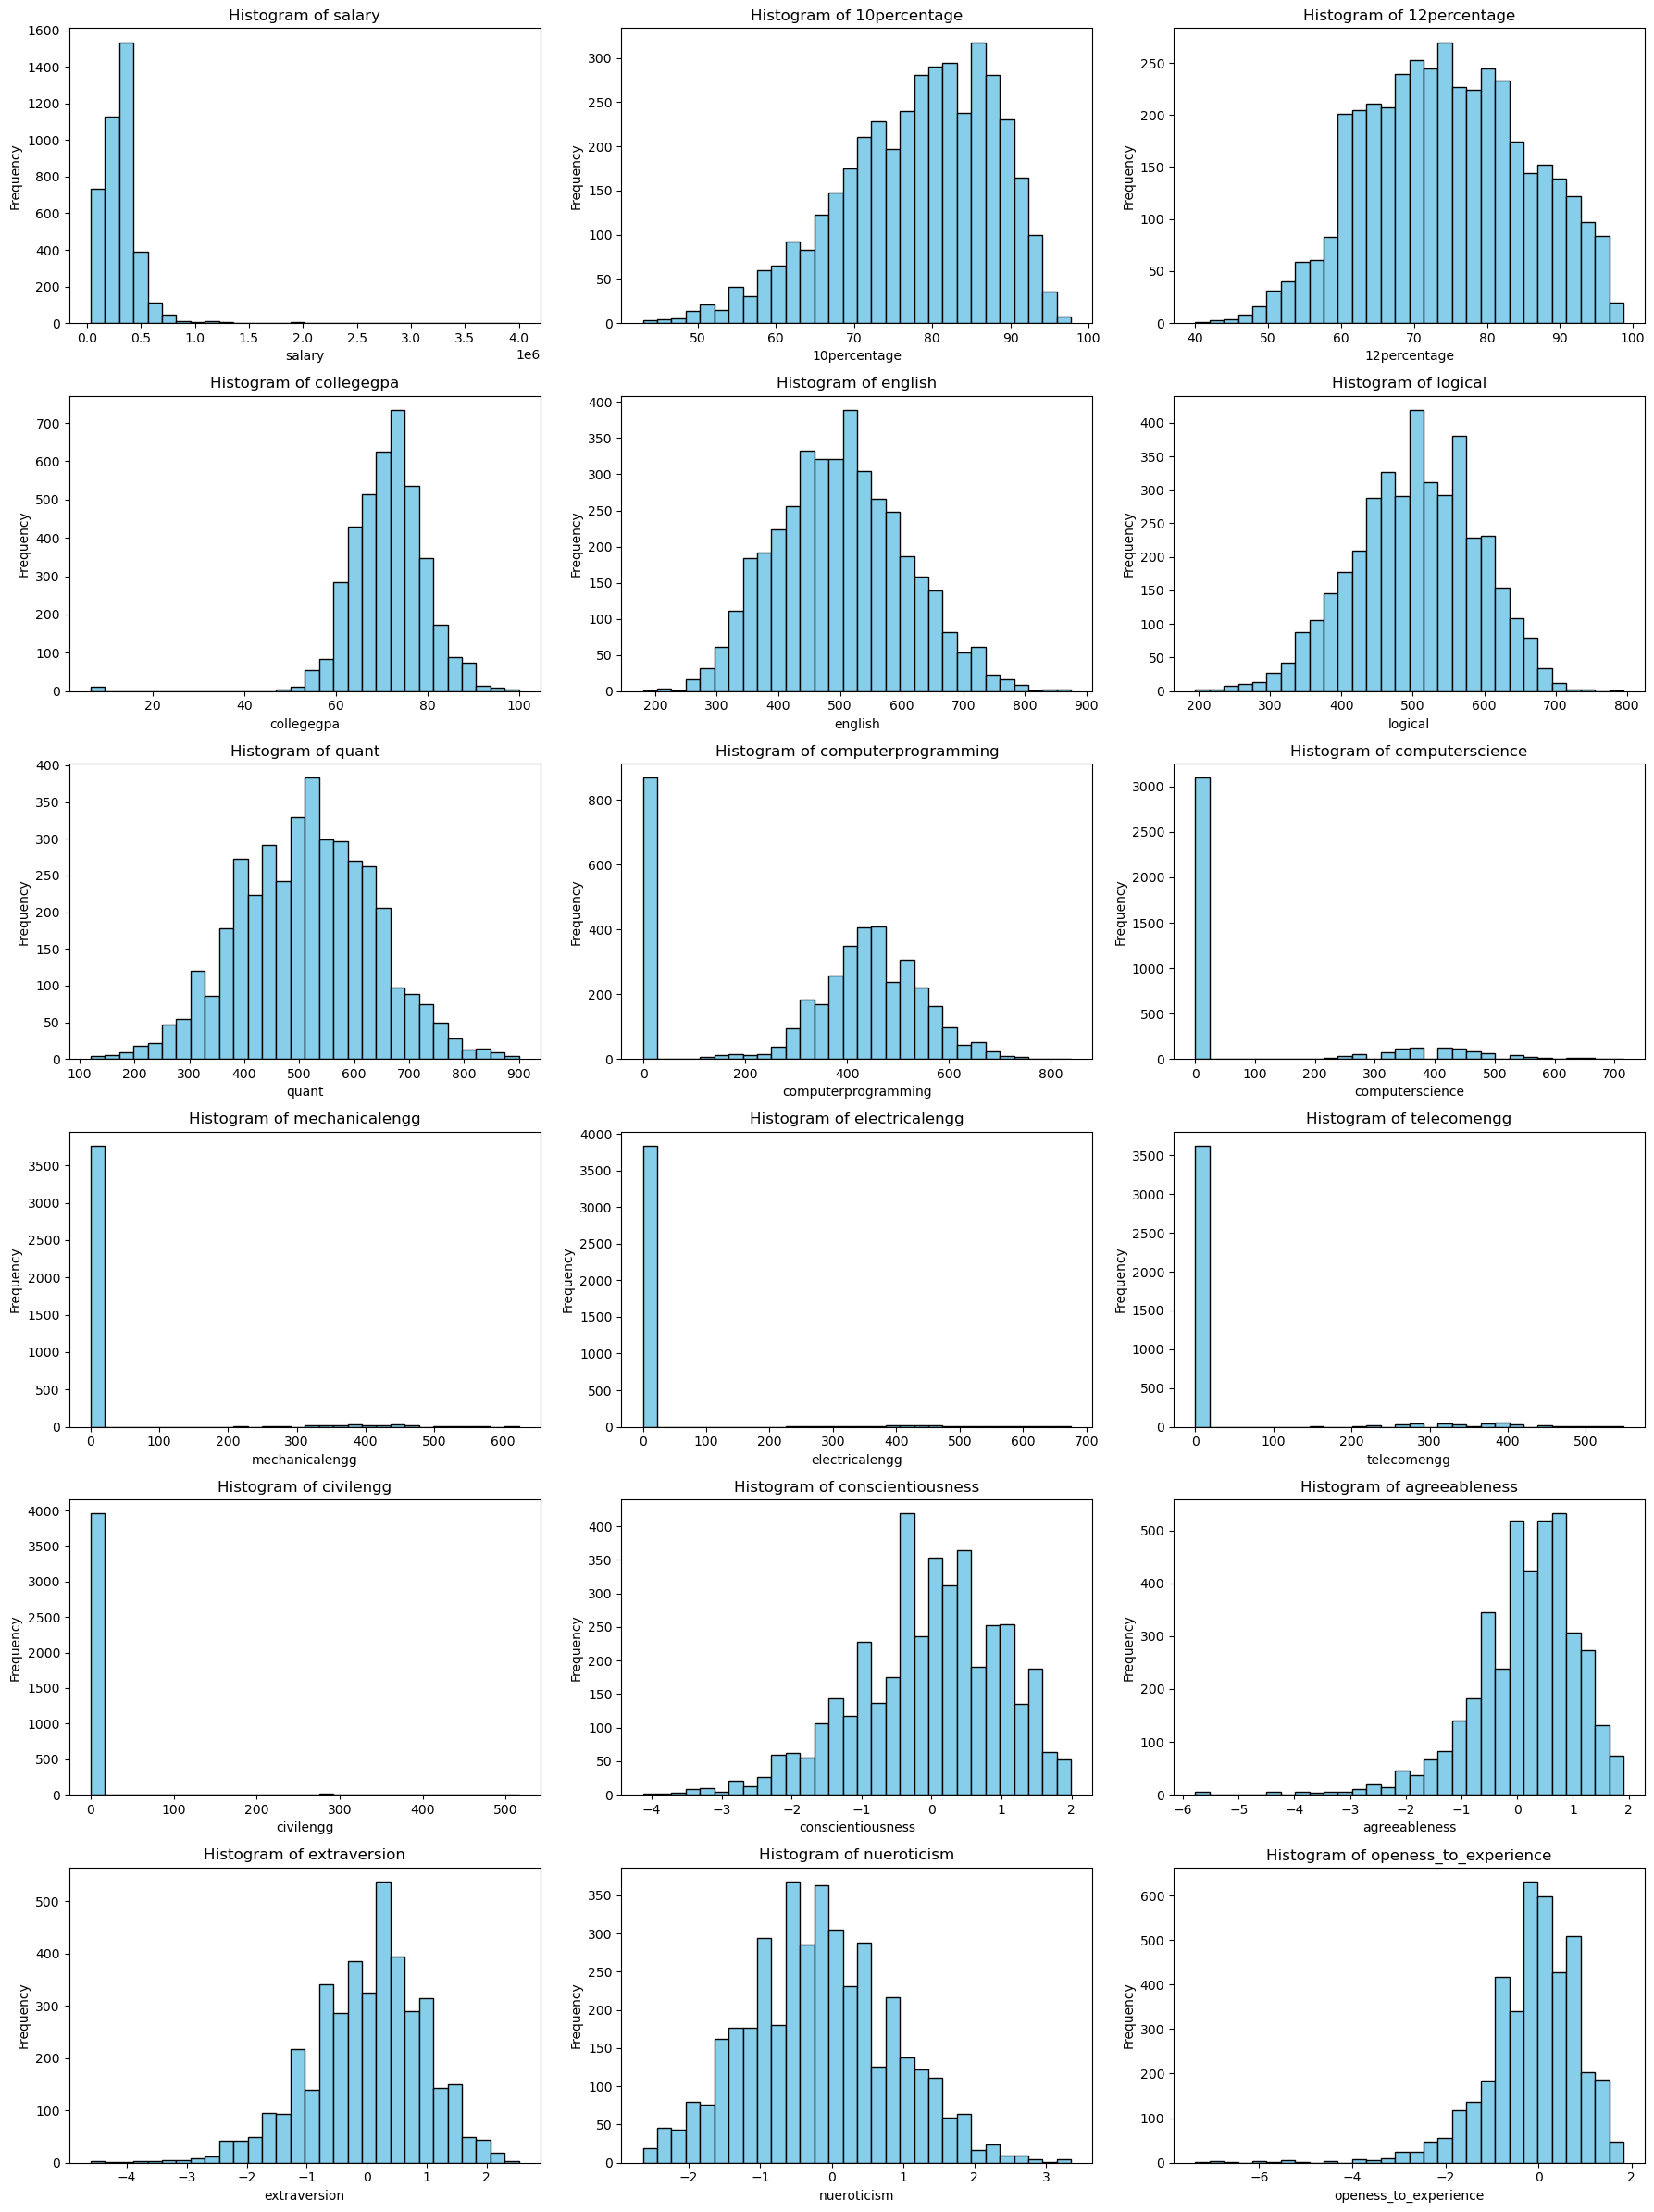

In [62]:
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical',
                   'quant', 'computerprogramming', 'computerscience','mechanicalengg',
                   'electricalengg', 'telecomengg', 'civilengg',
'conscientiousness',
                  'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() 

for i, column in enumerate(columns_to_plot):
    axes [i].hist(data [column].dropna(), bins=30, color='skyblue',edgecolor='black') 
    axes [i].set_title(f'Histogram of {column}') 
    axes [i].set_xlabel(column)
    axes [i].set_ylabel('Frequency') 

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout ()

plt.show()

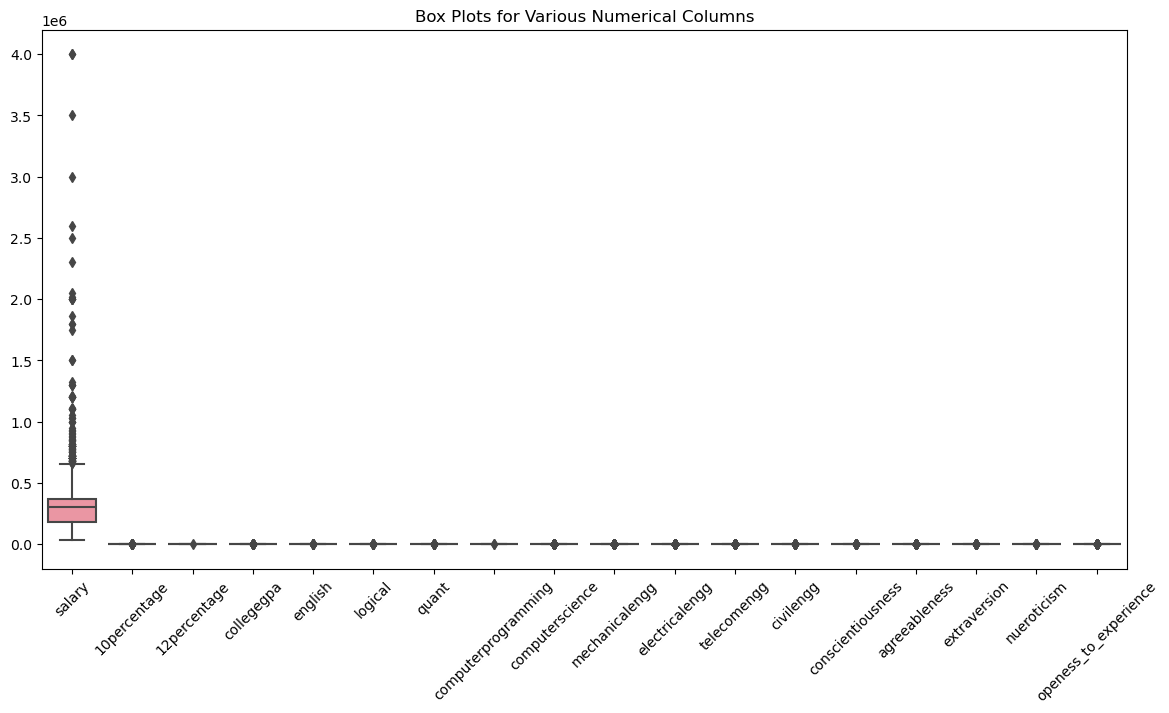

In [66]:
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical', 'quant', 'computerprogramming',
'computerscience', 'mechanicalengg', 'electricalengg',
'telecomengg', 'civilengg', 'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']

plt.figure(figsize=(14, 7))
sns.boxplot (data=data [columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()

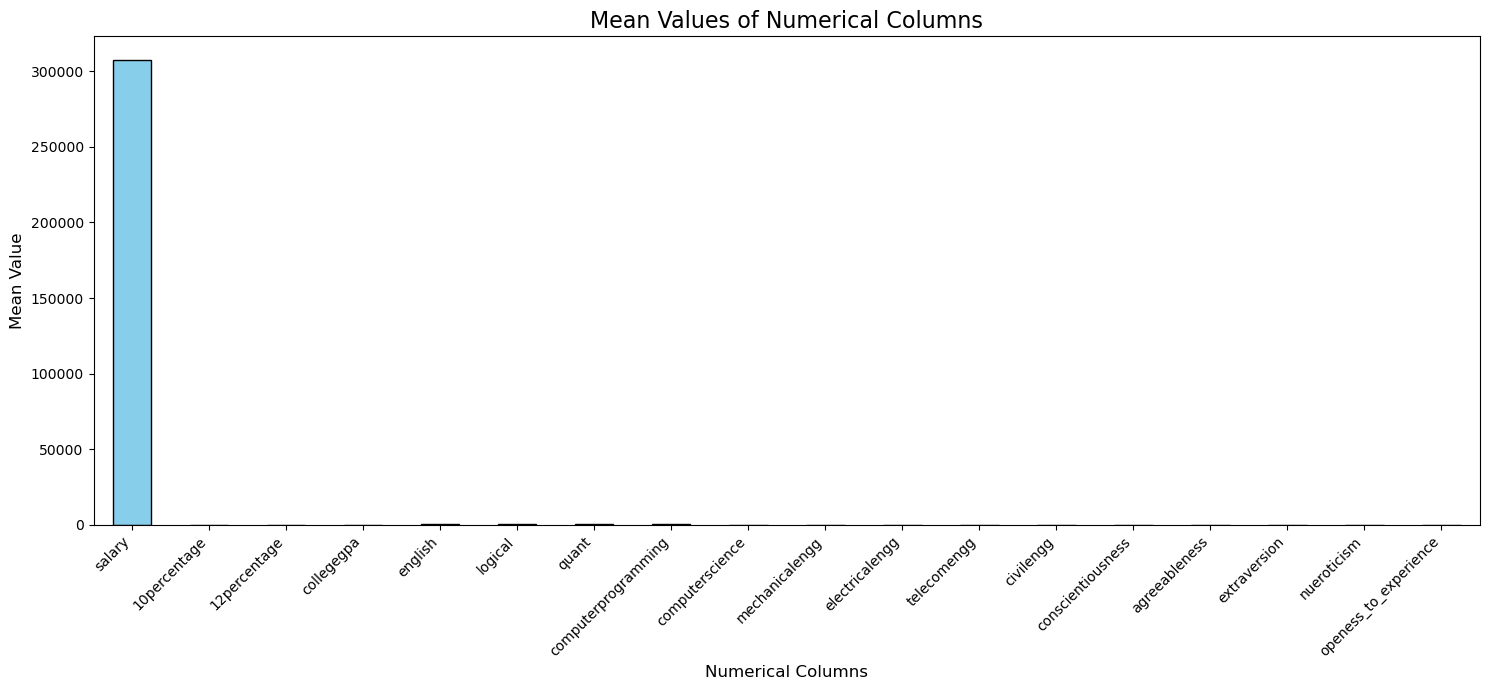

In [70]:
import matplotlib.pyplot as plt

columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa' , 
'english', 'logical','quant','computerprogramming','computerscience','mechanicalengg',
                   'electricalengg', 'telecomengg', 'civilengg',
'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']

mean_values = data [columns_to_plot].mean()

plt.figure(figsize=(15, 7)) 
mean_values.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Mean Values of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout ()
plt.show()

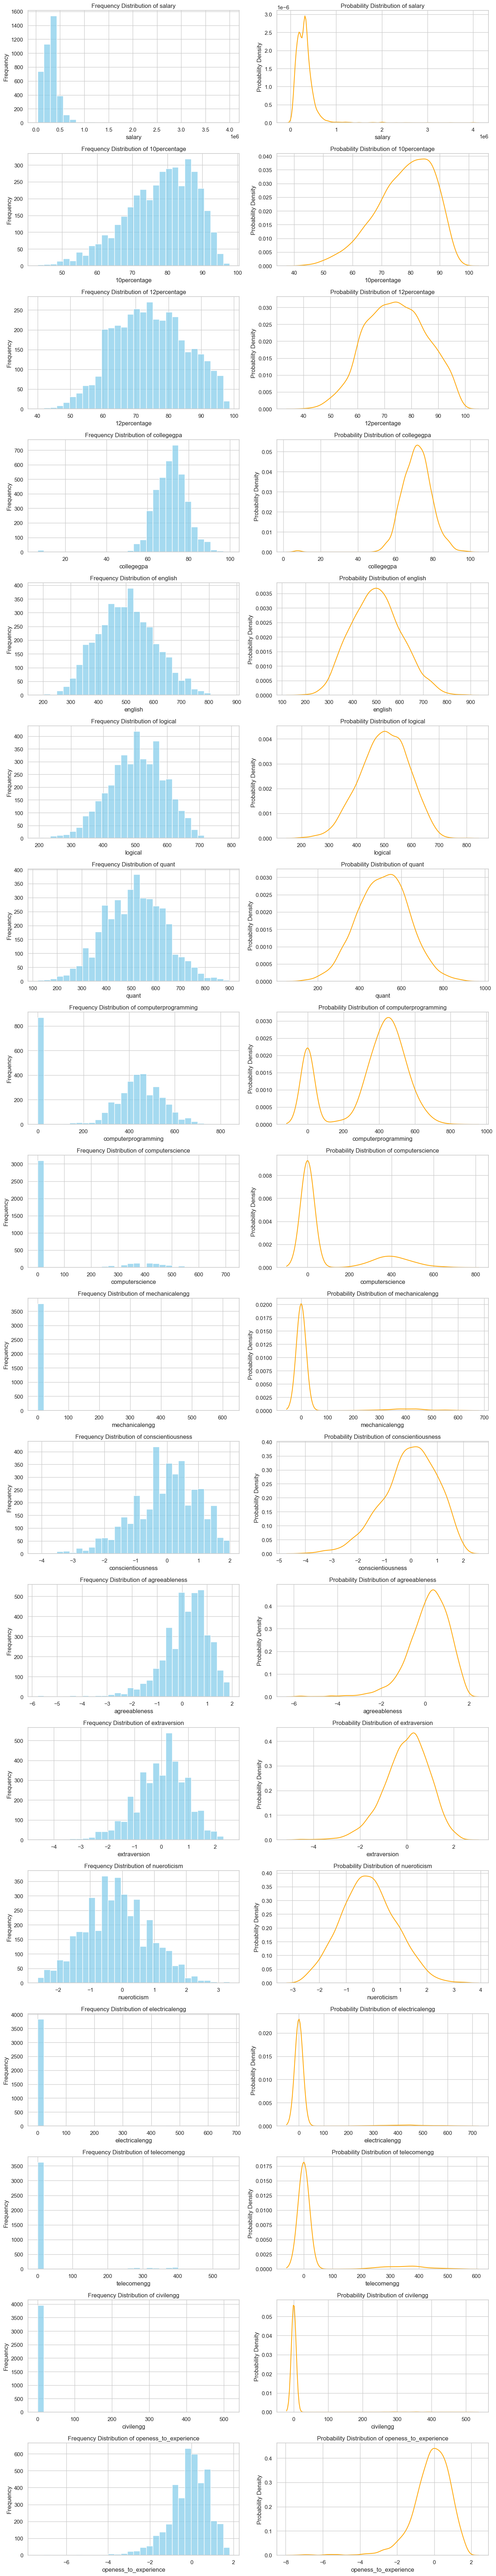

In [78]:
sns.set (style="whitegrid")

columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa' , 'english', 'logical',
                   'quant', 'computerprogramming', 'computerscience' ,'mechanicalengg',
'conscientiousness','agreeableness', 'extraversion', 'nueroticism' ,'electricalengg', 'telecomengg', 'civilengg','openess_to_experience']

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(14,len(columns_to_plot) * 4))

for i, column in enumerate(columns_to_plot):
    sns.histplot(data [column], ax=axes[i, 0], bins=30, kde=False, color='skyblue')
    axes [i, 0].set_title(f'Frequency Distribution of {column}', fontsize=12)
    axes [i, 0].set_xlabel (column)
    axes [i, 0].set_ylabel ('Frequency')

    sns.kdeplot(data [column], ax=axes[i, 1], color='orange')
    axes [i, 1].set_title(f'Probability Distribution of {column}', fontsize=12)
    axes[i, 1].set_xlabel(column)
    axes [i, 1].set_ylabel ('Probability Density')

plt.tight_layout ()
plt.show()



<Axes: xlabel='gender', ylabel='count'>

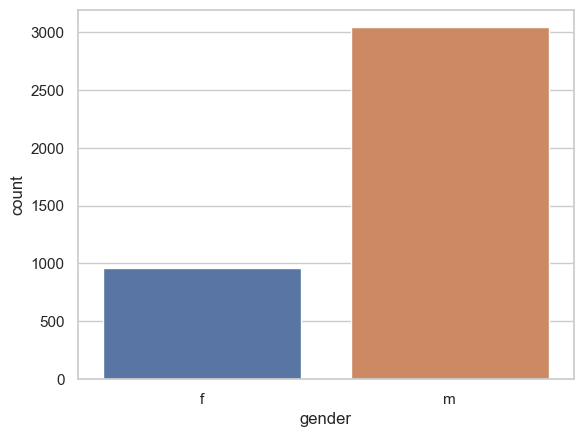

In [82]:
sns.countplot(x=data['gender'])

In [84]:
data.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

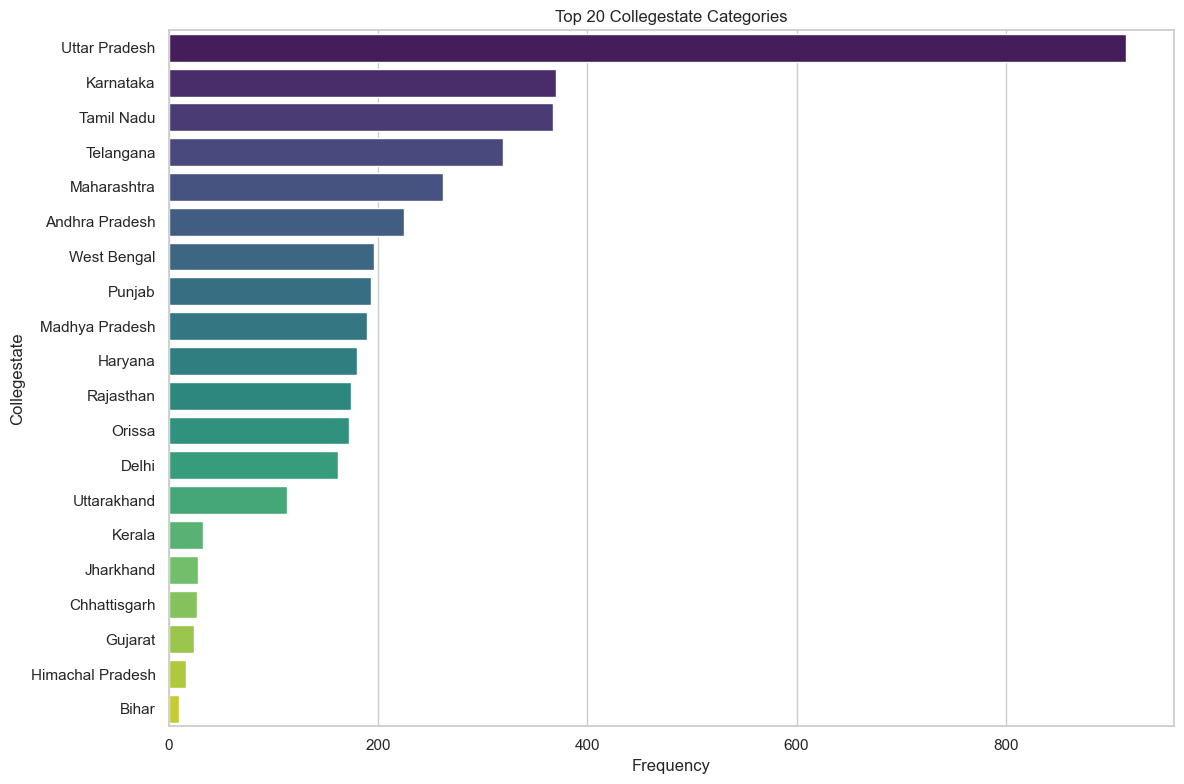

In [88]:
top_collegestates = data ['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot (y='collegestate', data=data [data ['collegestate'].isin(top_collegestates.index)],
palette='viridis', order=top_collegestates.index)
plt.title('Top 20 Collegestate Categories')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')
plt.tight_layout()
plt.show()

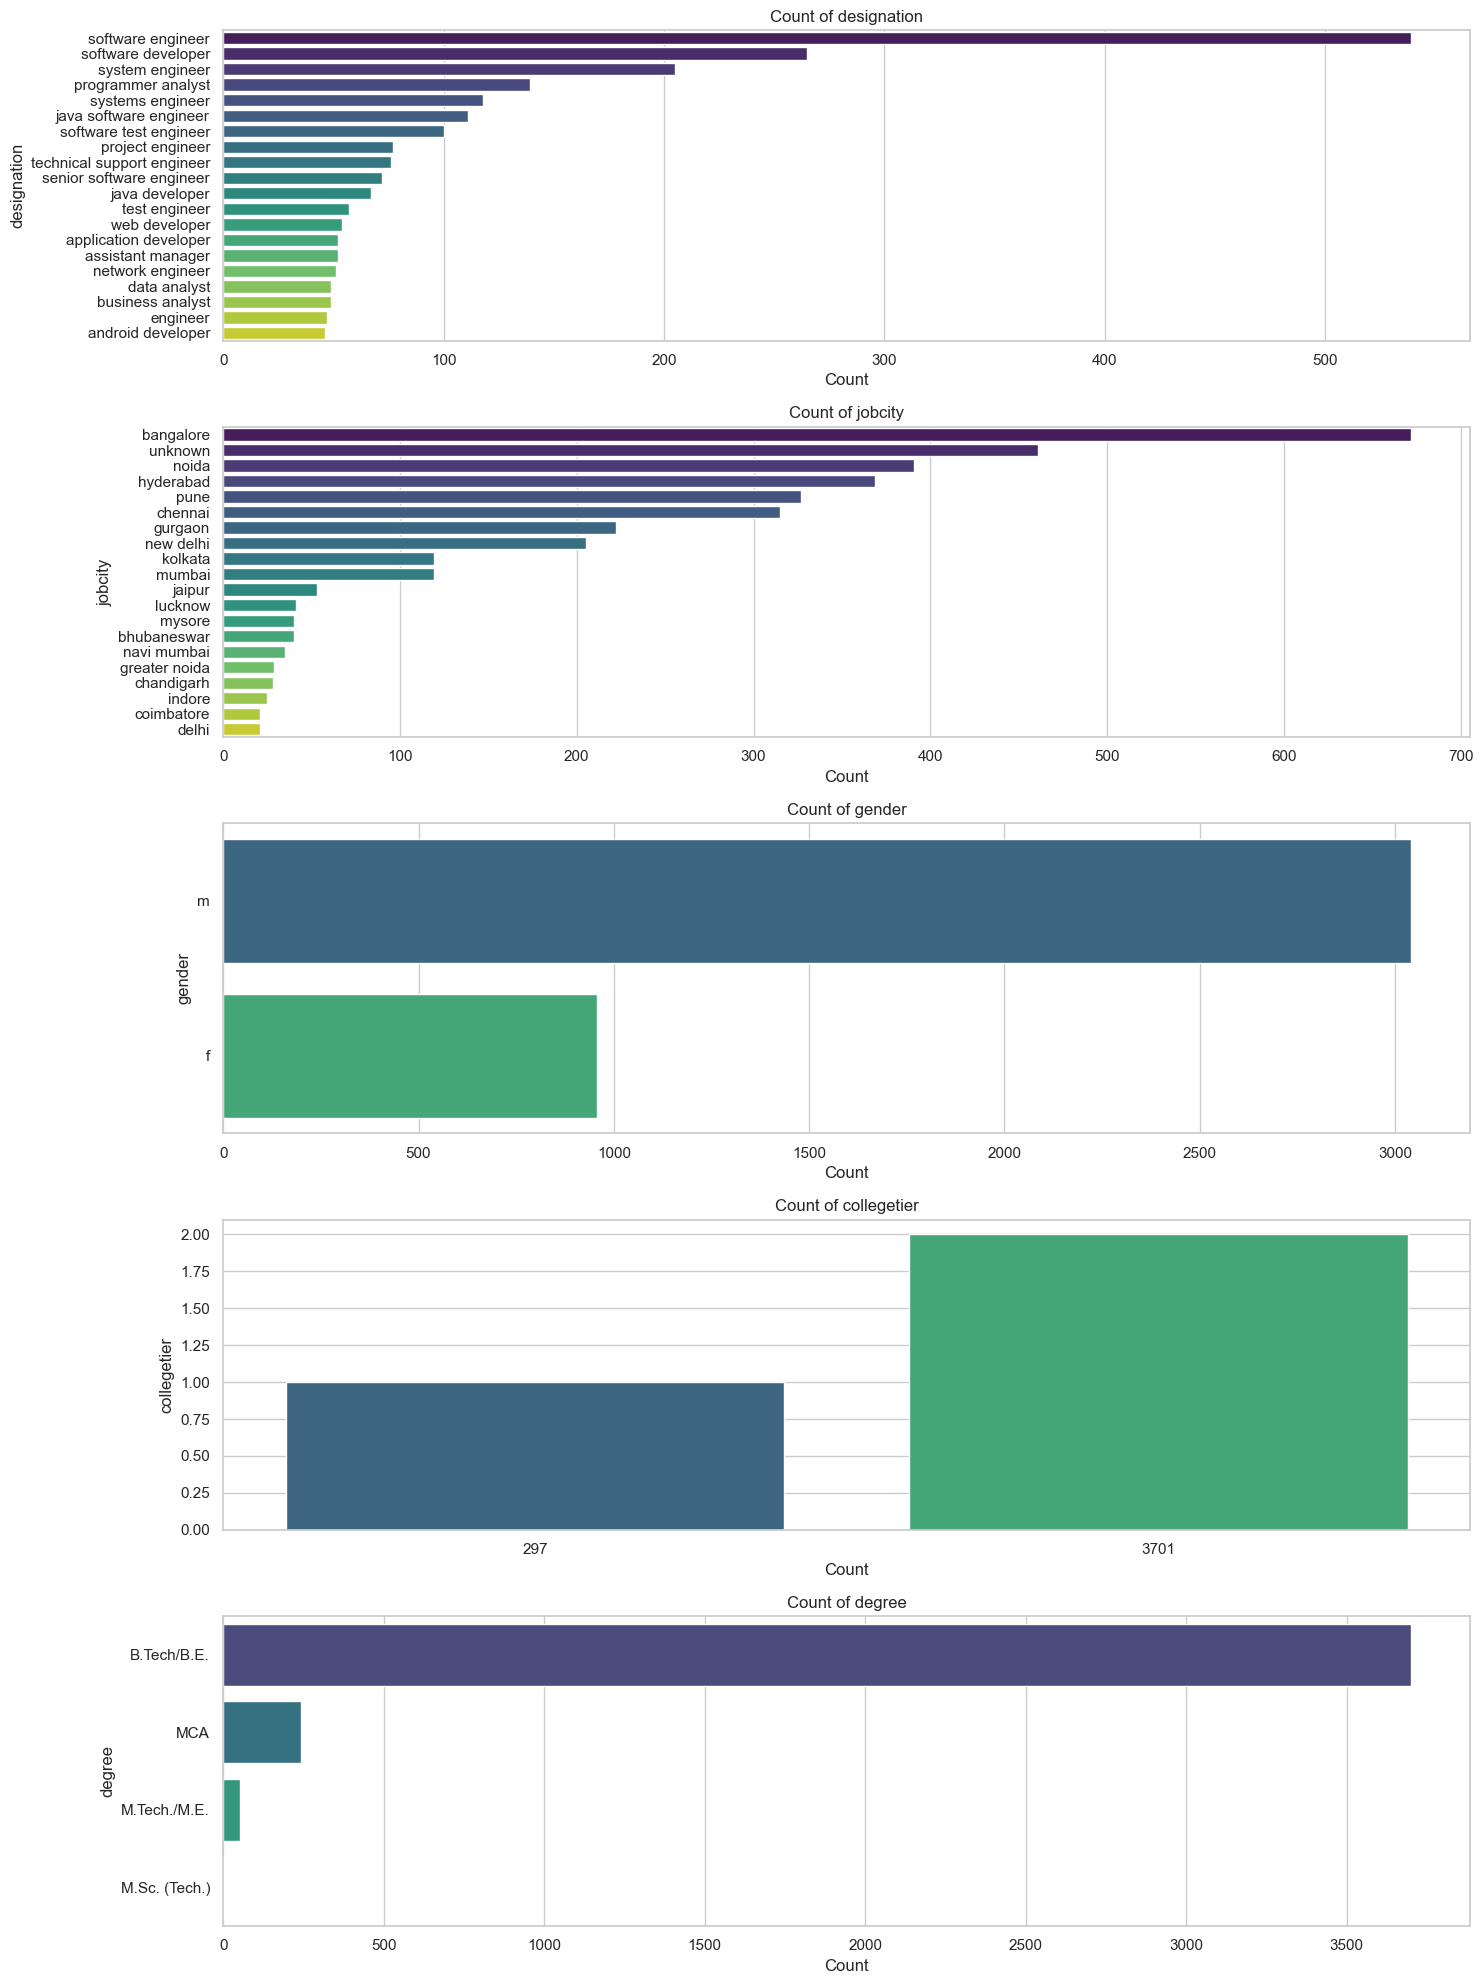

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
important_categorical_columns = ['designation', 'jobcity', 'gender' , 
'collegetier', 'degree']

plt.figure(figsize=(15, 20)) 
for i, column in enumerate(important_categorical_columns):
    plt.subplot(len(important_categorical_columns), 1, i + 1) 
    top_values = data [column].value_counts().nlargest(20) 
    sns.barplot(x=top_values. values, y=top_values. index, palette='viridis') 
    plt.title(f'Count of {column}') 
    plt.xlabel ('Count') 
    plt.ylabel (column)

plt.tight_layout() 
plt.show()

2.BIVARIATE ANALYSIS

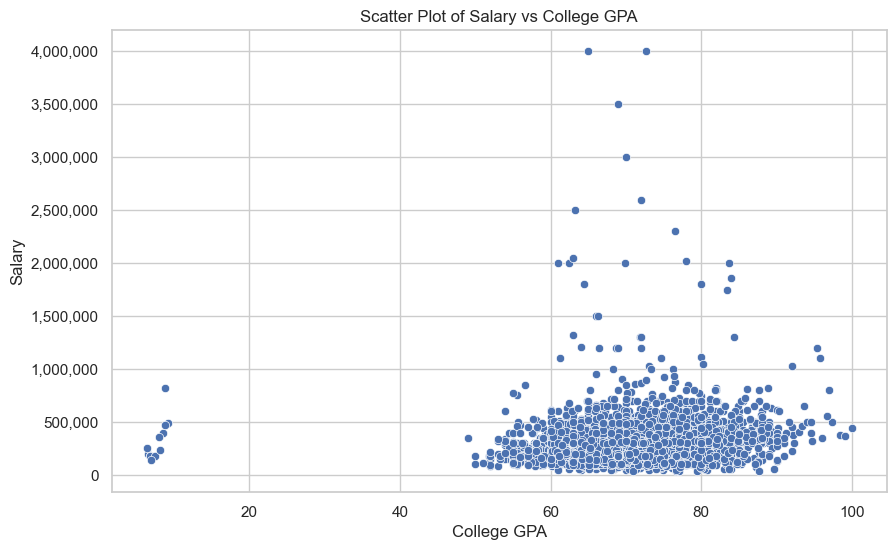

In [96]:
from matplotlib. ticker import FuncFormatter

def currency(x, _):
    return f'{int(x):,}' 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='collegegpa', y='salary')
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

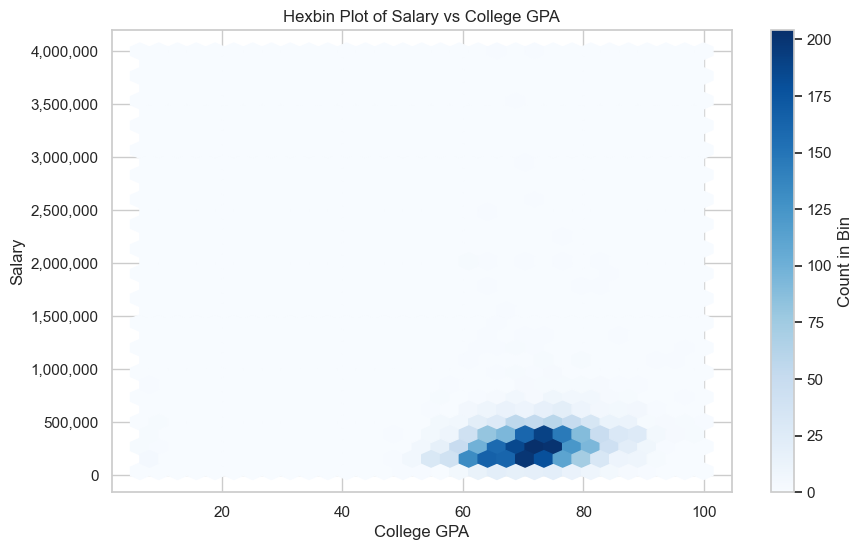

In [98]:
plt.figure(figsize=(10, 6))
plt.hexbin(data ['collegegpa'], data ['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show

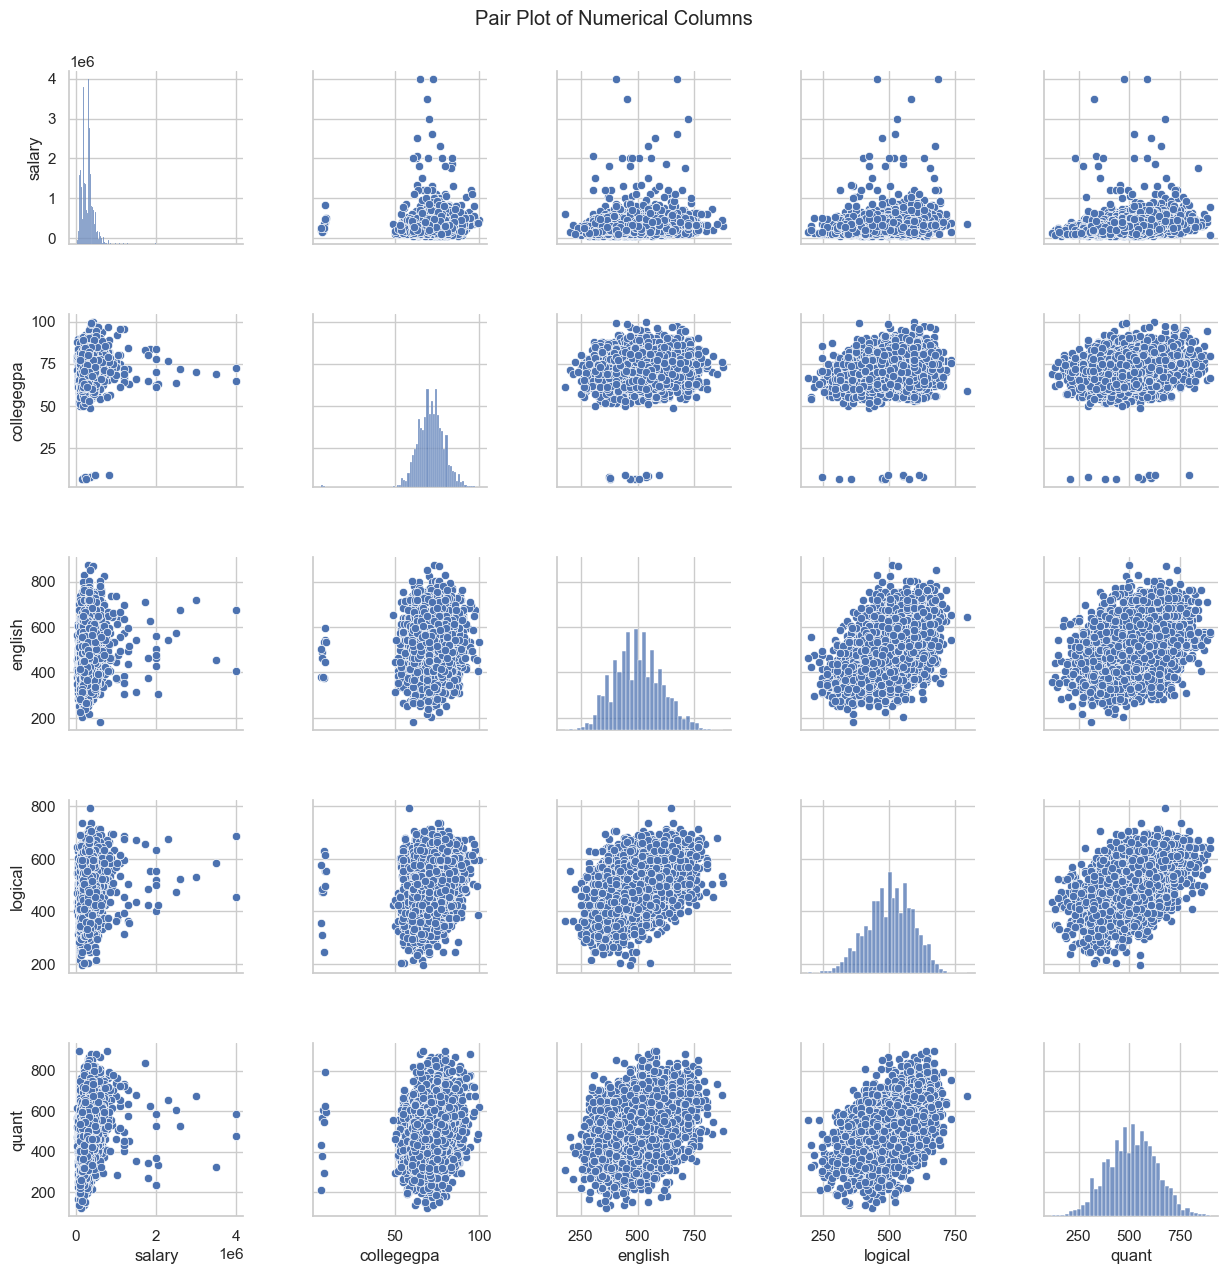

In [100]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(data [numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.show()

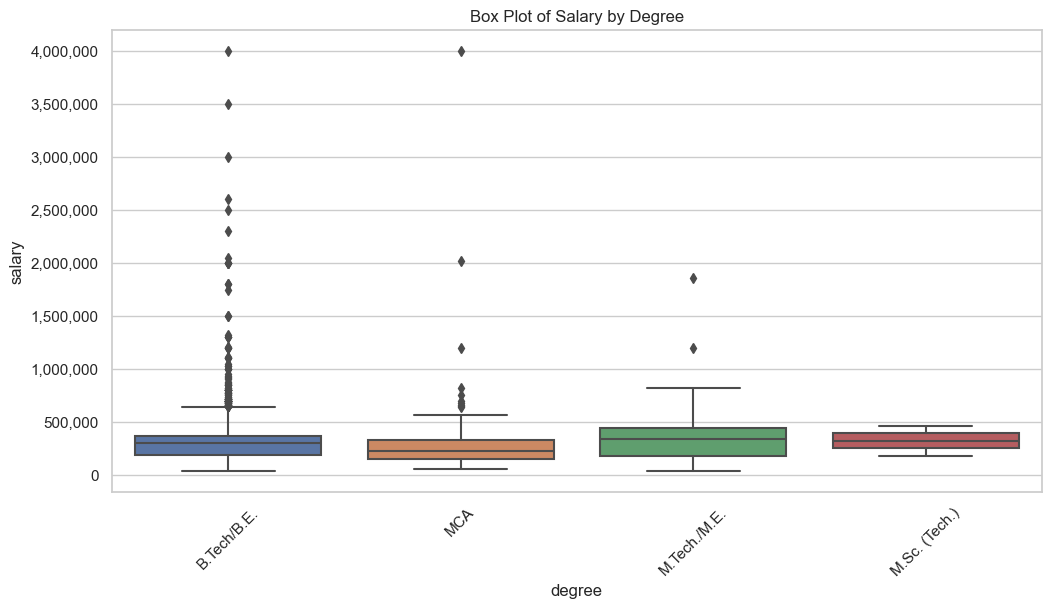

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot (data=data, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

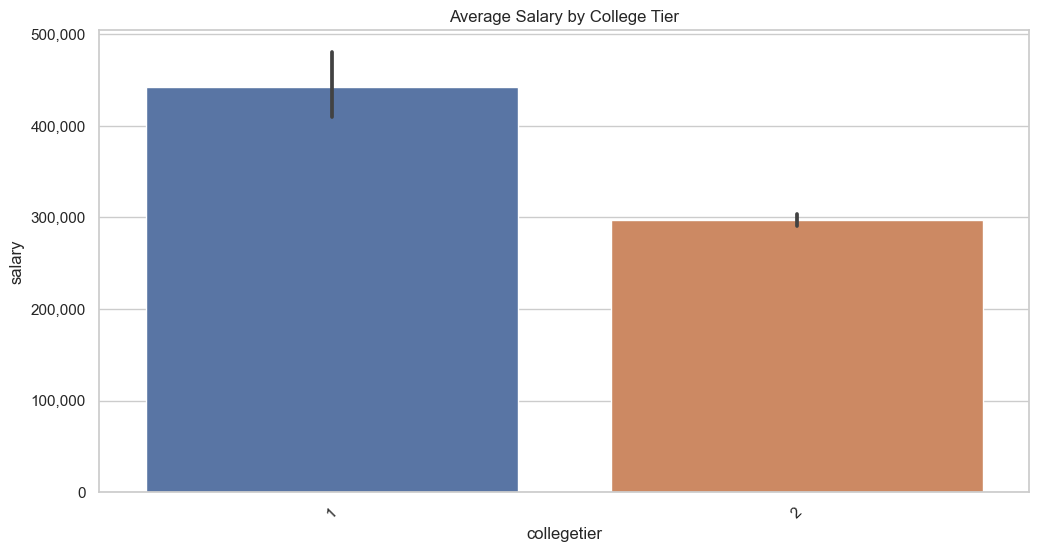

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='collegetier', y='salary', estimator=np.mean)
plt.title ('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

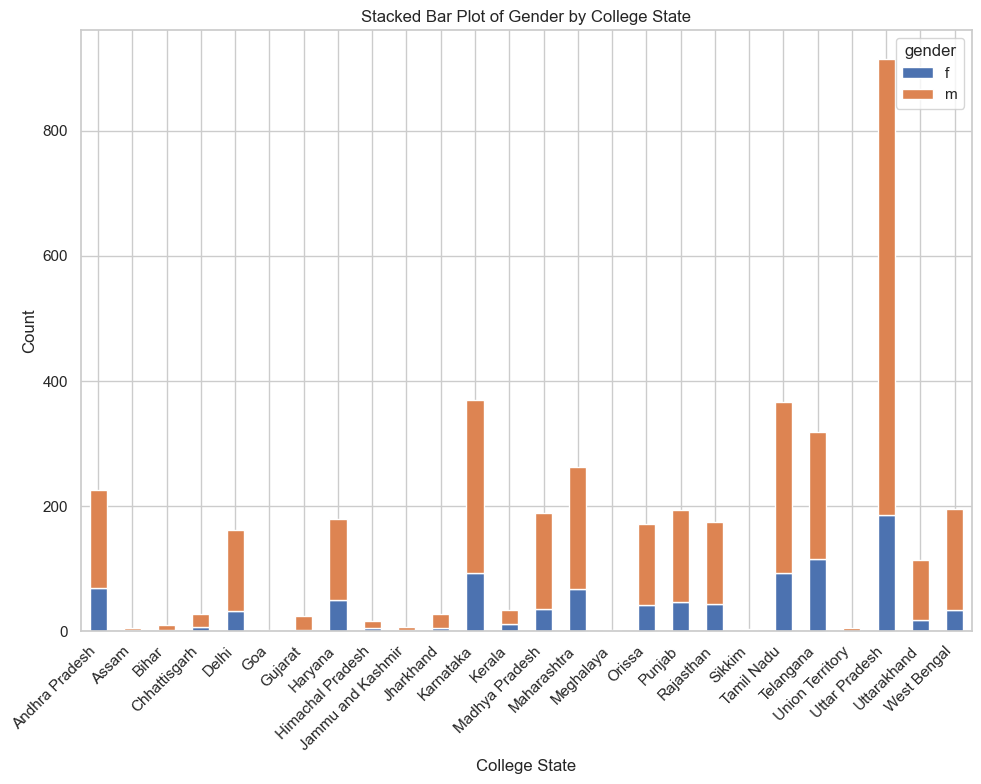

In [106]:
pivot_table = data.pivot_table(index='collegestate', columns='gender' ,values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Adjusted alignment to 'right'
plt.tight_layout () # Adjust layout to prevent clipping
plt.show()

3.  RESEARCH QUESTIONS

In [134]:
# List of roles mentioned in the claim
roles_to_test = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']

# Filtering data for these roles
data_roles = data[data['designation'].str.lower().isin(roles_to_test)]

# Calculating the average salary for these roles
average_salary = data_roles['salary'].mean()

# Display the result
print(f"Average Salary for {roles_to_test} roles: {average_salary}")

# This code will give the average salary of graduates with the specified job titles, which can then be compared to the range of 2.5-3 lakhs.




Average Salary for ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer'] roles: 339792.0433996383


In [124]:
from scipy.stats import chi2_contingency

# Create a contingency table of Gender and Specialization
contingency_table = pd.crosstab(data['gender'], data['specialization'])

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Conclusion based on the p-value
if p < 0.05:
    print("There is a significant relationship between Gender and Specialization (reject null hypothesis).")
else:
    print("No significant relationship between Gender and Specialization (fail to reject null hypothesis).")
    
# This test will help determine whether there's a statistically significant relationship between gender and specialization. 
# If the p-value is less than 0.05, we conclude that the preference for specialization depends on gender.


Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between Gender and Specialization (reject null hypothesis).
